In [33]:
# imports
from bokeh.io import push_notebook, show, output_notebook
from bokeh.palettes import d3

from bokeh.layouts import row 
from bokeh.plotting import figure
from bokeh.transform import cumsum


from math import pi
import pandas as pd

output_notebook()

Loading BokehJS ...

In [34]:
# load trade data
forest_trade = pd.read_csv("data/faostat/Forestry_Trade_Flows_E_All_Data_cleared.csv", engine='python')

In [3]:
 # create dataframe containing all wood trades between countries
trade_from = forest_trade[forest_trade.Element.str.match("Export Value") | forest_trade.Element.str.match("Export Quantity") ][["Reporter Countries", "Partner Countries", "Item", "Year", "Unit", "Value"]].rename(columns={"Reporter Countries": "Exporting Country", "Partner Countries": "Importing Country"})

trade_to = forest_trade[forest_trade.Element.str.match("Import Value") | forest_trade.Element.str.match("Import Quantity") ][["Partner Countries", "Reporter Countries", "Item", "Year", "Unit", "Value"]].rename(columns={"Reporter Countries": "Exporting Country", "Partner Countries": "Importing Country"})

trade_all = pd.concat([trade_from, trade_to], ignore_index=True)

trade_all= trade_all[~trade_all["Importing Country"].str.match("Total FAO")]
#trade_all= trade_from[ ~trade_from["Importing Country"].str.match("Total FAO")]

/home/martin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [20]:

trade_from[trade_from["Exporting Country"].str.startswith("FAO")]

,Exporting Country,Importing Country,Item,Year,Unit,Value


In [31]:
trade_from.Value.sum()

19377492637.0

In [29]:
trade_to[trade_to["Exporting Country"].str.startswith("Other")]

,Importing Country,Exporting Country,Item,Year,Unit,Value


In [28]:
trade_to = trade_to[~trade_to["Importing Country"].str.startswith("Other")]

In [32]:
trade_to.Value.sum()

35854982402.0

In [26]:
trade_all = trade_all.drop_duplicates(keep="first")

In [27]:
len(trade_all)

2549087

In [29]:
# top-10 countries in wood export (in 1000 US$) in years 2010-2017
trade_all[(trade_all.Year >= 2010) & (trade_all.Unit.str.match("1000 US\$"))].groupby("Exporting Country").Value.sum().sort_values(ascending=False).head(30)

Exporting Country
China                       836031000.0
United States of America    729505593.0
Germany                     593430032.0
Canada                      423732159.0
Sweden                      274381068.0
France                      242022291.0
Finland                     233031111.0
Japan                       229587540.0
Italy                       221941837.0
United Kingdom              196942689.0
Russian Federation          189699128.0
Belgium                     169069429.0
Austria                     162160068.0
Indonesia                   159876397.0
Brazil                      155045828.0
Netherlands                 150986524.0
Spain                       139061935.0
Poland                      125928723.0
Republic of Korea           122519678.0
India                        95181954.0
Malaysia                     92974298.0
Chile                        85043494.0
Thailand                     82333777.0
Mexico                       81919649.0
Turkey                

In [30]:
trade_all[(trade_all.Year >= 2010) & (trade_all.Unit.str.match("1000 US\$"))].groupby("Exporting Country").Value.sum().sort_values(ascending=False).head(30)

Exporting Country
China                       836031000.0
United States of America    729505593.0
Germany                     593430032.0
Canada                      423732159.0
Sweden                      274381068.0
France                      242022291.0
Finland                     233031111.0
Japan                       229587540.0
Italy                       221941837.0
United Kingdom              196942689.0
Russian Federation          189699128.0
Belgium                     169069429.0
Austria                     162160068.0
Indonesia                   159876397.0
Brazil                      155045828.0
Netherlands                 150986524.0
Spain                       139061935.0
Poland                      125928723.0
Republic of Korea           122519678.0
India                        95181954.0
Malaysia                     92974298.0
Chile                        85043494.0
Thailand                     82333777.0
Mexico                       81919649.0
Turkey                

In [8]:
PRIMARY_FORREST_PRODUCTS = [
    'Forest products (export/import)',
    'Industrial roundwood:coniferous (export/import)',
    'Industrial roundwood:non-coniferous tropical (export/import)',
    'Industrial roundwood:non-coniferous non-tropical (export/import)',
    'Paper and paperboard:excluding newsprint',
    'Sawnwood:coniferous',
    'Sawnwood:non-coniferous all',
    'Wood pulp']

In [42]:
trade_all.Item.unique()

array(['Forest products (export/import)',
       'Industrial roundwood:non-coniferous non-tropical (export/import)',
       'Sawnwood:coniferous', 'Veneer sheets', 'Plywood',
       'Paper and paperboard:excluding newsprint',
       'Sawnwood:non-coniferous all',
       'Industrial roundwood:coniferous (export/import)',
       'Industrial roundwood:non-coniferous tropical (export/import)',
       'Fibreboard', 'Newsprint', 'Wood chips and particles', 'Wood pulp'],
      dtype=object)

In [31]:
# top-10 countries in wood export (in m3) in years 2010-2017
trade_all[(trade_all.Year >= 2010) & (trade_all.Unit.str.match("m3"))].groupby("Exporting Country").Value.sum().sort_values(ascending=False).head(10)

Exporting Country
China                       880946074.0
United States of America    438802717.0
Russian Federation          386774031.0
Canada                      386577629.0
Japan                       290213267.0
Germany                     259184223.0
Sweden                      182422763.0
Austria                     152067326.0
Finland                     151530444.0
New Zealand                 150573080.0
Name: Value, dtype: float64

In [32]:
# top-10 countries in wood export (in tonnes) in years 2010-2017
trade_all[(trade_all.Year >= 2010) & (trade_all.Unit.str.match("tonnes"))].groupby("Exporting Country").Value.sum().sort_values(ascending=False).head(10)

Exporting Country
United States of America    281012648.0
Germany                     243478782.0
China                       238913929.0
Canada                      167301549.0
Sweden                      116932741.0
Brazil                      113490327.0
Finland                     110558603.0
France                       94745555.0
Italy                        93811652.0
Indonesia                    74992726.0
Name: Value, dtype: float64

In [33]:
# top-15 exporters of industrial roundwood (in 1000 US$) from 2010 (incl.)
top_usd_exp = trade_all[(trade_all.Item.isin(PRIMARY_FORREST_PRODUCTS)) & (trade_all.Year >= 2010) & (trade_all.Unit.str.match("1000 US\$"))].groupby("Exporting Country").Value.sum().sort_values(ascending=False).head(15)

In [34]:
# value of export roundwood (in 1000 US$) from 2010 (incl.)
all_exp = trade_all[(trade_all.Item.isin(PRIMARY_FORREST_PRODUCTS)) & (trade_all.Year >= 2010) & (trade_all.Unit.str.match("1000 US\$"))].Value.sum()

In [13]:
import matplotlib.pyplot as plt

top_usd_exp_id = list(top_usd_exp.index.values)
top_usd_exp_id.append("Other")

top_usd_exp_vals = list(top_usd_exp.values)
top_usd_exp_vals.append(all_exp - top_usd_exp.sum())

data = pd.DataFrame(list(zip(top_usd_exp_id, top_usd_exp_vals)), columns =['Country', 'Value']) 
data['angle'] = data['Value']/data['Value'].sum() * 2*pi
data['color'] = d3["Category20"][len(top_usd_exp_id)]
percentage=100*(data['Value']/data['Value'].sum())
data['Percentage']=percentage
data['Value'] = data['Value'] / 1000000

p = figure(plot_height=1000, plot_width=1000, title="Export of wood from 2010 (1000 USD)", toolbar_location=None,
           tools="hover", tooltips="@Country: @Percentage{0.2f} %, @Value{0.2f} bil. US$%", x_range=(-.4, .4))

p.annular_wedge(x=0, y=1,  inner_radius=0.15, outer_radius=0.25, direction="anticlock",
                start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', source=data, legend_field='Country')
p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

In [35]:
a = trade_all[(trade_all.Item.isin(PRIMARY_FORREST_PRODUCTS)) & (trade_all.Year >= 2010) & (trade_all.Unit.str.match("1000 US\$"))].groupby("Importing Country").Value.sum().sort_values(ascending=False)

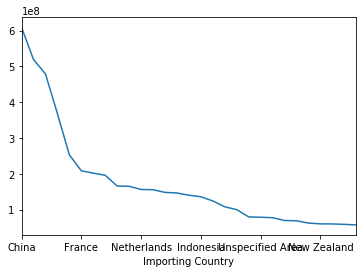

In [36]:
a[1:30].plot()


In [16]:
a[:60]

Importing Country
China                         477844564.0
United States of America      287505391.0
Germany                       231125438.0
Others (adjustment)           208489549.0
Italy                         135728837.0
United Kingdom                133398317.0
France                        119098042.0
Japan                         116434507.0
Netherlands                    96308479.0
Belgium                        71357736.0
India                          69703367.0
Republic of Korea              66048641.0
Spain                          64583771.0
Poland                         64343602.0
Canada                         62995435.0
Mexico                         61400055.0
Unspecified Area               56410884.0
Austria                        53501071.0
Turkey                         49664800.0
Egypt                          39963311.0
Indonesia                      33844949.0
Viet Nam                       33768784.0
Saudi Arabia                   30849860.0
Australia       

,Exporting Country,Importing Country,Item,Unit,Value,Year
0,Afghanistan,Austria,Forest products (export/import),1000 US$,3.0,2000
1,Afghanistan,Austria,Forest products (export/import),1000 US$,3.0,2001
2,Afghanistan,Austria,Forest products (export/import),1000 US$,5.0,2004
3,Afghanistan,Austria,Forest products (export/import),1000 US$,135.0,2007
4,Afghanistan,Austria,Industrial roundwood:non-coniferous non-tropic...,m3,38.0,2000
...,...,...,...,...,...,...
2689095,Zimbabwe,Zambia,Paper and paperboard:excluding newsprint,1000 US$,35.0,2012
2689096,Zimbabwe,Zambia,Paper and paperboard:excluding newsprint,1000 US$,15.0,2013
2689097,Zimbabwe,Zambia,Paper and paperboard:excluding newsprint,1000 US$,18.0,2014
2689098,Zimbabwe,Zambia,Paper and paperboard:excluding newsprint,1000 US$,11.0,2015


In [17]:
trade_all[(trade_all.Item.isin(PRIMARY_FORREST_PRODUCTS)) & (trade_all.Year >= 2010) & (trade_all.Unit.str.match("1000 US\$"))].groupby(["Exporting Country", "Importing Country"]).Value.sum().sort_values(ascending=False).head(20)

Exporting Country         Importing Country       
Canada                    United States of America    178339962.0
United States of America  China                        83212248.0
Canada                    China                        62553109.0
United States of America  Canada                       53165353.0
Russian Federation        China                        51899153.0
United States of America  Mexico                       42994760.0
Sweden                    Germany                      40367232.0
Germany                   Others (adjustment)          35464718.0
Brazil                    China                        30166258.0
Finland                   Germany                      29358177.0
Sweden                    United Kingdom               27621664.0
Indonesia                 China                        26781060.0
China                     Others (adjustment)          25751895.0
Germany                   France                       25660210.0
United States of America 